# 5. Clustering - Modeling
## Anforderungen an Projektumsetzung: Clustering

---
**AUFGABE:**

Führen Sie mit dem Algorithmus Ihrer Wahl eine Clusteranalyse auf Ihren Daten durch.

In [1]:
# Imports

from sklearn import cluster, datasets

import matplotlib.pyplot as plt

from sklearn import metrics

import pandas as pd

In [3]:
apps = pd.read_csv("Daten/Google-Playstore.csv")

In [4]:
print(apps)

                                                  App Name  \
0                                                  Gakondo   
1                                      Ampere Battery Info   
2                                                   Vibook   
3        Smart City Trichy Public Service Vehicles 17UC...   
4                                                  GROW.me   
...                                                    ...   
2312939                                           大俠客—熱血歸來   
2312940                                         ORU Online   
2312941                                     Data Structure   
2312942                                        Devi Suktam   
2312943                       Biliyor Musun - Sonsuz Yarış   

                                       App Id       Category  Rating  \
0                         com.ishakwe.gakondo      Adventure     0.0   
1                  com.webserveis.batteryinfo          Tools     4.4   
2                        com.doantiepvi

In [17]:
# Evalutation ohne Zielklassen, da kein target vorhanden
dataset = apps[['Rating', 'Price']].dropna()

In [13]:
kmeans = cluster.KMeans(n_clusters=6, random_state=6).fit(dataset)

In [14]:
print(kmeans.labels_)

[1 0 1 ... 1 0 0]


In [15]:
for i in range(0,6):
    print("Cluster_label:", i, "Anzahl der Apps: ", list(kmeans.labels_).count(i))

Cluster_label: 0 Anzahl der Apps:  1209755
Cluster_label: 1 Anzahl der Apps:  1073963
Cluster_label: 2 Anzahl der Apps:  68
Cluster_label: 3 Anzahl der Apps:  547
Cluster_label: 4 Anzahl der Apps:  5635
Cluster_label: 5 Anzahl der Apps:  93


In [16]:
kmeans.cluster_centers_

array([[4.13472860e+00, 4.46899988e-02],
       [2.71870632e-02, 3.51354663e-02],
       [7.72058824e-01, 3.60769230e+02],
       [1.43071298e+00, 6.23735145e+01],
       [2.34129547e+00, 1.27262223e+01],
       [1.25376344e+00, 1.81389103e+02]])

- Es wurden 6 Cluster gewählt, weil es Bewertungen von 1.0 bis 5.0 existieren. Zu dem gibt es Apps, die keine Bewertungen haben und in diesem Datensatz mit 0.0 gesetzt wurden. 
- In dieser Clusteranalyse wurde das 
    - Clusterlabel 0: 1209755 mal indentifiziert und
    - Clusterlabel 5: 93 mal indetifziert.
- Clusterlabel 0 hat die Rating-Zentroide bei durchschnittlich  4.134, welche ebenso durchschnittlich bei 0.04 USD liegen.
- Das Clusterlabel 2 wiederum hat die Rating-Zentroide bei durchschnittlich 0.772, welche bei durchschnittlich 360.76 USD liegen.

---
**AUFGABE:**

Setzen Sie die Parameter des Algorithmus mit Hilfe überwachter oder unüberwachter Evaluationsmethoden. 
Begründen Sie die Auswahl des Evaluationsalgorithmus.

In [40]:
rating_gr = apps.groupby('Rating')
rating_gr['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Rating,,,,,,,,
0.0,1059762.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
1.0,713.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,1.0
1.1,236.0,1.1,4.450331e-16,1.1,1.1,1.1,1.1,1.1
1.2,531.0,1.2,0.000000e+00,1.2,1.2,1.2,1.2,1.2
1.3,579.0,1.3,0.000000e+00,1.3,1.3,1.3,1.3,1.3
1.4,1011.0,1.4,0.000000e+00,1.4,1.4,1.4,1.4,1.4
1.5,1157.0,1.5,0.000000e+00,1.5,1.5,1.5,1.5,1.5
1.6,1644.0,1.6,2.221122e-16,1.6,1.6,1.6,1.6,1.6
1.7,1928.0,1.7,4.442044e-16,1.7,1.7,1.7,1.7,1.7


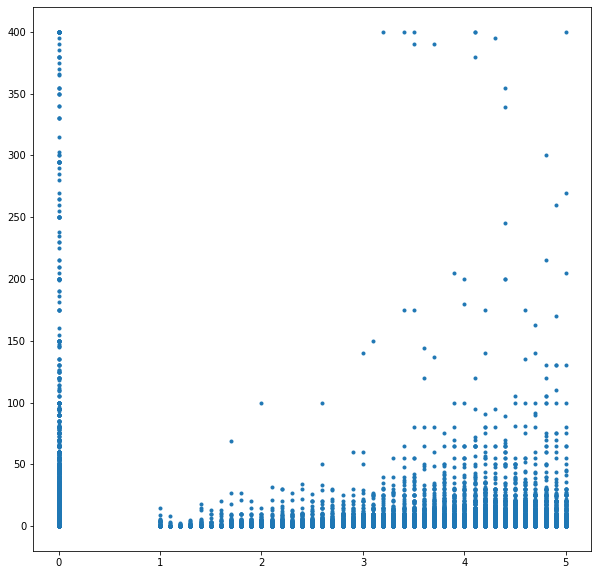

In [38]:
# Scatter-Plot
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x=apps['Rating'], y=apps['Price'], marker='.')
plt.show()

In [32]:
# Es wird auf 42 Cluster analysiert, da insgesamt 42 Rating-Klassen existieren.
kmeans_gr = cluster.KMeans(n_clusters=42, random_state=6).fit(dataset)

In [33]:
print(kmeans_gr.labels_)

[ 0 28  0 ...  0 16 21]


In [34]:
for i in range(0,42):
    print("Cluster_label:", i, "Anzahl der Apps: ", list(kmeans_gr.labels_).count(i))

Cluster_label: 0 Anzahl der Apps:  1040489
Cluster_label: 1 Anzahl der Apps:  120538
Cluster_label: 2 Anzahl der Apps:  16
Cluster_label: 3 Anzahl der Apps:  73
Cluster_label: 4 Anzahl der Apps:  268
Cluster_label: 5 Anzahl der Apps:  10
Cluster_label: 6 Anzahl der Apps:  196318
Cluster_label: 7 Anzahl der Apps:  1752
Cluster_label: 8 Anzahl der Apps:  194
Cluster_label: 9 Anzahl der Apps:  39698
Cluster_label: 10 Anzahl der Apps:  19
Cluster_label: 11 Anzahl der Apps:  2983
Cluster_label: 12 Anzahl der Apps:  8279
Cluster_label: 13 Anzahl der Apps:  13
Cluster_label: 14 Anzahl der Apps:  14
Cluster_label: 15 Anzahl der Apps:  1346
Cluster_label: 16 Anzahl der Apps:  102916
Cluster_label: 17 Anzahl der Apps:  417
Cluster_label: 18 Anzahl der Apps:  42
Cluster_label: 19 Anzahl der Apps:  4216
Cluster_label: 20 Anzahl der Apps:  173
Cluster_label: 21 Anzahl der Apps:  142741
Cluster_label: 22 Anzahl der Apps:  5076
Cluster_label: 23 Anzahl der Apps:  16
Cluster_label: 24 Anzahl der Apps:

In [35]:
kmeans_gr.cluster_centers_

array([[-8.79740725e-13,  3.66235610e-06],
       [ 3.95472631e+00,  4.36918649e-06],
       [ 8.93750000e-01,  2.53927500e+02],
       [ 1.12191781e+00,  9.73310889e+01],
       [ 2.41380597e+00,  2.49252193e+01],
       [ 4.10000000e-01,  3.76090000e+02],
       [ 4.69154688e+00,  8.99803379e-06],
       [ 4.19600457e+00,  6.92218455e+00],
       [ 1.23350515e+00,  4.99095158e+01],
       [ 2.35938586e+00,  6.54267661e-03],
       [ 6.00000000e-01,  1.50286678e+02],
       [ 3.60375461e-02,  4.40489799e+00],
       [ 4.18845411e+00,  2.50747064e+00],
       [ 6.76923077e-01,  3.44529231e+02],
       [ 1.75714286e+00,  1.78402838e+02],
       [ 2.28083210e-02,  6.89270763e+00],
       [ 3.36736173e+00,  9.91471482e-04],
       [ 4.08824940e+00,  1.47034973e+01],
       [ 1.65000000e+00,  7.22643887e+01],
       [ 4.16771822e+00,  4.58273352e+00],
       [ 1.85722543e+00,  3.86074044e+01],
       [ 4.96941594e+00,  8.29739880e-06],
       [ 2.28329393e-02,  2.42746303e+00],
       [ 2.

- Teilweise sehr große Unterschiede zwischen den Zentroiden bei 42 Parametern
- Unterschiede entstehen möglicherweise aufgrund des Abstandes zwischen den Bewertungen 0.0 und 1.0

---
**AUFGABE:**

Betrachten Sie die gebildeten Cluster. 
Wie gut sind sie intuitiv? 
Welche Informationen über Ihren Datensatz ziehen Sie daraus? 
Leiten sich weitere Schritte der Datenbereinigung oder der Datenaufbereitung ab?

- Die abgebildeten Cluster sind nicht intuitiv, weil die Abstände innerhalb einer Gruppierung (Rating) weit auseinander liegen.
    - es existierten u.a. Apps, die bspw. mit einer Bewertung von 3.1 zwischen 0 und 400 USD liegen und unterschiedlichen Clustern zugeordnet werden
- Nächst einzuleitende Schritte wären die Ratings in Klassen zu gruppieren und innerhalb der Klassen eine Clusteranalyse führen.
    - Man führt eine Clusteranalyse innerhalb der Klasse mit den 4.1er Bewertungen durch.
    - Eine zusätzlich Gruppierung innerhalb einer Preisklasse ist ebenso möglich.

---
**AUFGABE:**

Können Sie in Ihrem Projektkontext Clustering noch für weitere Zwecke (z.B. Outlier Detection oder Profilerstellung) verwenden? 
(Dies ist nicht immer der Fall.) Skizzieren Sie ggf. kurz ein mögliches Vorgehen.

- Aus Sicht des eigenen Unternehmen gibt es mit dem aktuellen Zustand der Daten keinen weiteren Zweck ein Clustering durchzuführen. 
- Aus Sicht vom Google Playstore könnte ein zusätzliches Clustering Sinn ergeben, weil dadurch Profile von klassischen Endnutzern erstellt werden können, um bspw. gezielter App-Vorschläge zu generieren.
- Aus Sicht des Endnutzers bestehen keine Anreize Clusteranalysen durchzuführen. 